# Bakery Sales Analysis 2013-2015

**About Data**

*Atributes*
- Weekday - Day of the week
- Date - Date of sales
- Cakes - Number of cakes sold
- Pies - Number of pies sold
- Cookies - Number of cookies sold
- Smoothies - Number of smoothies sold on a particular day
- Coffee - Number of Coffee sold on a particular day
- Promotion - If there were any offers or not, “None” if there were no offers and “promotion” if there were any special offers or discounts


## Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading Data

In [8]:
df = pd.read_csv('BakeryData.csv')
df.head()

,daywk,weekday,Date,Cakes,Pies,Cookies,Smoothies,Coffee,promotion
0,Tuesday,2,1/1/2013,79,46,518,60,233,none
1,Wednesday,3,1/2/2013,91,50,539,161,427,none
2,Thursday,4,1/3/2013,47,60,222,166,347,none
3,Friday,5,1/4/2013,89,64,734,153,358,none
4,Saturday,6,1/5/2013,112,73,764,240,392,none


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

## Exploratory Data Analysis

In [10]:
cols = ['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee']

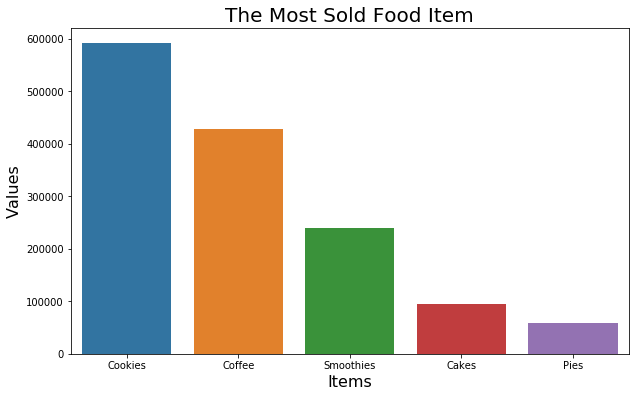

In [26]:
cols_sum = df[cols].sum(axis=0).sort_values(ascending=False)

df1 = pd.DataFrame(cols_sum, columns=['Values'])
df1.reset_index(inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(data=df1, x='index', y='Values')
plt.xlabel('Items', fontsize=16)
plt.ylabel('Values', fontsize=16)
plt.title('The Most Sold Food Item', fontsize=20)
plt.show()

**Obervation:**
- Cookies is the most sold item as per our dataset

## How do promotions affect sales of items?

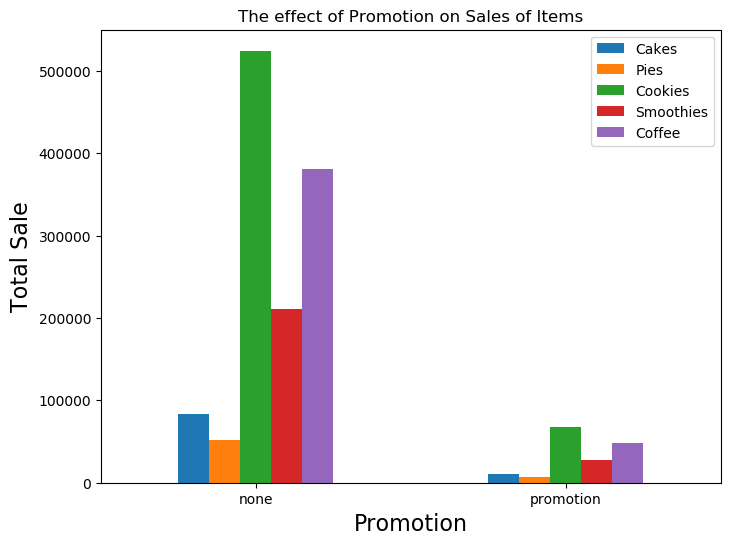

In [43]:
df1 = df.groupby(['promotion'])[cols].agg('sum')

f,ax = plt.subplots(figsize=(8,6), dpi=100)
df1.plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation='horizontal')
plt.xlabel('Promotion', fontsize=16)
plt.ylabel('Total Sale', fontsize=16)
plt.title('The effect of Promotion on Sales of Items')
plt.show()

**Observation:**
- Promotion days are very less as compared to non promotion days. But still we can say Cookies and Coffee sold the most on promotion day.

## Differentiation between weekend and weekdays sales

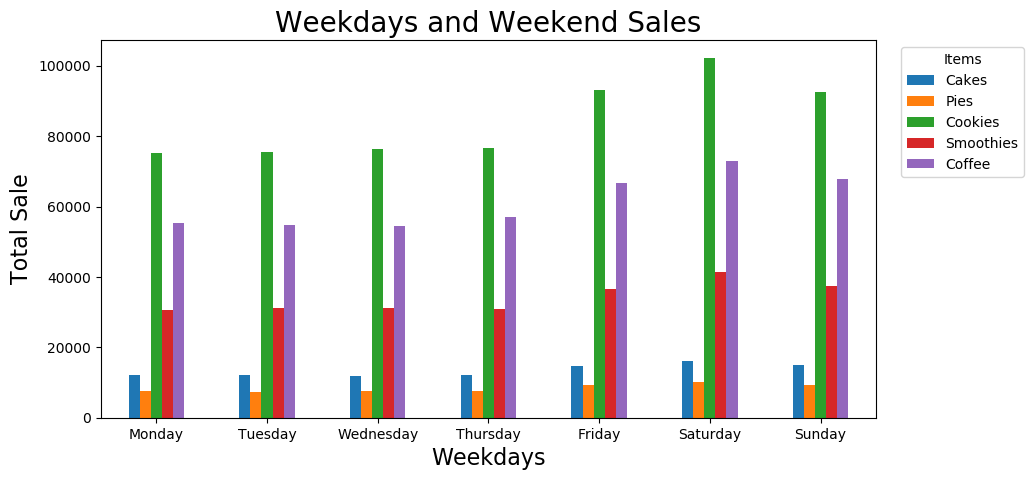

In [67]:
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df2 = df.groupby('daywk')[cols].agg('sum').reindex(labels=week_order)
f,ax = plt.subplots(figsize=(10,5), dpi=100)
df2.plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation='horizontal')
plt.xlabel('Weekdays', fontsize=16)
plt.ylabel('Total Sale', fontsize=16)
plt.title('Weekdays and Weekend Sales', fontsize=20)
plt.legend(title='Items', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

**Observsation:**
- From the above graph we can see that sales are high in weekend.
- We also see that the lowest overall sales is on Monday and the highest sale is on Saturday.

## Has the sales improved over the span of last two years

In [55]:
df['Year'] = df['Date'].dt.strftime('%Y')

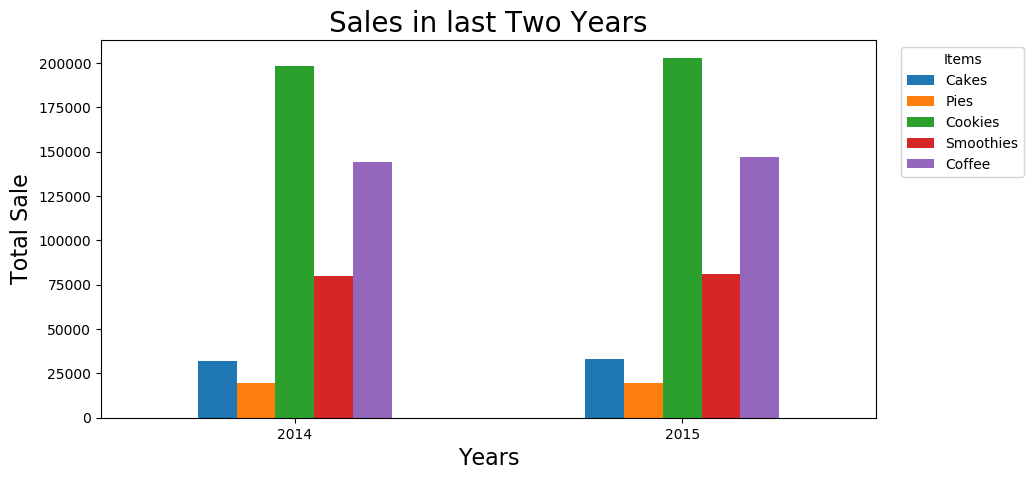

In [68]:
df3 = df.groupby(['Year'], as_index=True)[cols].agg('sum')

f,ax = plt.subplots(figsize=(10,5), dpi=100)
df3[-2:].plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation='horizontal')
plt.xlabel('Years', fontsize=16)
plt.ylabel('Total Sale', fontsize=16)
plt.title('Sales in last Two Years', fontsize=20)
plt.legend(title='Items', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

**Observation:**
- The overall sales in the last two years has not improved much, as per the graph  above,infact sales has increased slightly in 2015 

## Analyzing monthly sales to understand buying pattern.

In [71]:
df['Month'] = df['Date'].dt.strftime('%b')

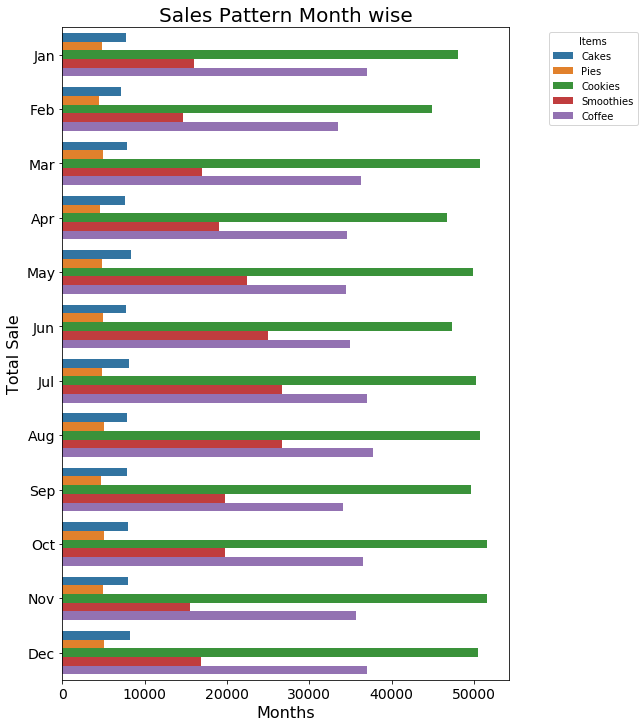

In [80]:
df4 = df.groupby(['Month'], as_index=False)[cols].agg('sum')
df4 = df4.reindex(index=[4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2])

plt.subplots(figsize=(8,12))
tidy = df4.melt(id_vars='Month').rename(columns=str.title)
sns.barplot(data=tidy, y='Month', x='Value', hue='Variable')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Months', fontsize=16)
plt.ylabel('Total Sale', fontsize=16)
plt.title('Sales Pattern Month wise', fontsize=20)
plt.legend(title='Items', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

**Observation:**
- From the graph above we see that there was a dip in overall sales in the month of Feb.